In [96]:
import torch

In [ ]:
a = 4.0
f = lambda y: a*y
y = lambda t: torch.exp(a*t)

def Euler(f, y0, t):
    y = torch.zeros_like(t)
    y[0] = y0
    for i in range(len(t)-1):
        # midpoint rule / modified Euler
        y[i+1] = y[i] + (t[i+1]-t[i]) * f( y[i] + (t[i+1]-t[i])/2 * f(y[i]) )
    return y

In [98]:
t_min, t_max = -1.0, 0.0
n_timesteps = 50
t_data = torch.linspace(t_min, t_max, n_timesteps)
y_data = y(t_data)

In [99]:
from matplotlib import pyplot as plt

In [100]:
y_euler = Euler(f, y_data[0], t_data)
y_euler

tensor([0.0183, 0.0199, 0.0216, 0.0234, 0.0254, 0.0275, 0.0299, 0.0324, 0.0352,
        0.0382, 0.0414, 0.0449, 0.0487, 0.0529, 0.0574, 0.0622, 0.0675, 0.0733,
        0.0795, 0.0862, 0.0936, 0.1015, 0.1101, 0.1195, 0.1297, 0.1407, 0.1526,
        0.1656, 0.1797, 0.1949, 0.2115, 0.2295, 0.2490, 0.2701, 0.2931, 0.3180,
        0.3450, 0.3743, 0.4061, 0.4406, 0.4780, 0.5186, 0.5627, 0.6105, 0.6624,
        0.7187, 0.7797, 0.8460, 0.9178, 0.9958])

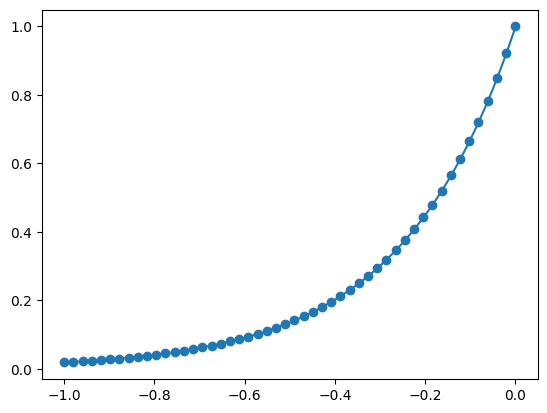

In [101]:
plt.scatter(t_data, y_data)
plt.plot(t_data, y_euler)

In [102]:
n_experiments = 1000
max_err = 0.01
noise = max_err * 2 * (torch.rand(n_experiments, n_timesteps) - 0.5)
Y = noise + y_data

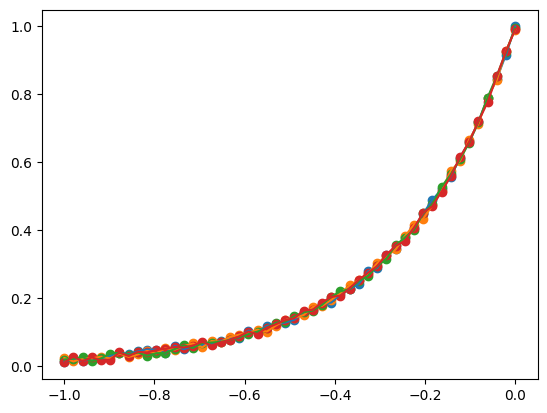

In [103]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n])
    plt.plot(t_data, Y[-n])

dataset: Y = n_experiments x n_timesteps

input:
    for NN: y0
    for ode solver: t_data

output:
    for NN: 

In [104]:
input_size = 1
hidden_size = 10
f_model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
) # t,y(t) -> f(t,y(t))
f_mod_wrap = lambda x: f_model(torch.tensor([x]))
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.001)

Y_preds = torch.zeros_like(Y)
f_model.train()
for e in range(n_experiments):
    y_exper = Y[e]
    y_euler = Euler(f_mod_wrap, y_exper[0], t_data)

    optimizer.zero_grad() # Clear gradients
    loss = 1/n_timesteps * torch.sum((y_euler - y_exper)**2)
    print(loss)
    loss.backward() # Backpropagation
    optimizer.step() # Update weights
    Y_preds[e] = y_euler

tensor(0.1405, grad_fn=<MulBackward0>)
tensor(0.1362, grad_fn=<MulBackward0>)
tensor(0.1339, grad_fn=<MulBackward0>)
tensor(0.1302, grad_fn=<MulBackward0>)
tensor(0.1255, grad_fn=<MulBackward0>)
tensor(0.1213, grad_fn=<MulBackward0>)
tensor(0.1238, grad_fn=<MulBackward0>)
tensor(0.1228, grad_fn=<MulBackward0>)
tensor(0.1191, grad_fn=<MulBackward0>)
tensor(0.1144, grad_fn=<MulBackward0>)
tensor(0.1102, grad_fn=<MulBackward0>)
tensor(0.1157, grad_fn=<MulBackward0>)
tensor(0.1144, grad_fn=<MulBackward0>)
tensor(0.1047, grad_fn=<MulBackward0>)
tensor(0.1048, grad_fn=<MulBackward0>)
tensor(0.1043, grad_fn=<MulBackward0>)
tensor(0.1047, grad_fn=<MulBackward0>)
tensor(0.1023, grad_fn=<MulBackward0>)
tensor(0.1014, grad_fn=<MulBackward0>)
tensor(0.0963, grad_fn=<MulBackward0>)
tensor(0.0969, grad_fn=<MulBackward0>)
tensor(0.0977, grad_fn=<MulBackward0>)
tensor(0.0948, grad_fn=<MulBackward0>)
tensor(0.0924, grad_fn=<MulBackward0>)
tensor(0.0939, grad_fn=<MulBackward0>)
tensor(0.0913, grad_fn=<M

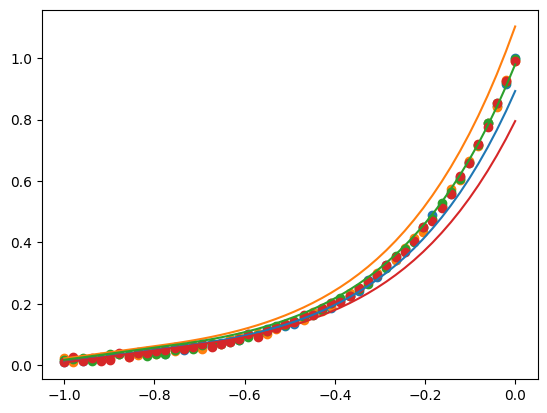

In [105]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n].detach())
    plt.plot(t_data, Y_preds[-n].detach())

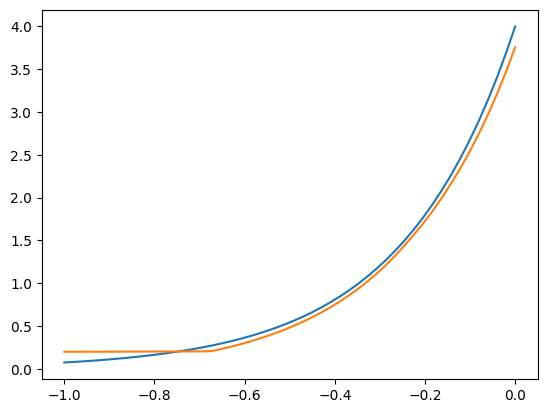

In [106]:
plt.plot(t_data, f(y_data))
plt.plot(t_data, [f_model.forward(torch.tensor([y])).detach() for y in y_data])